# Python to PLC Communication（OMRON）

2023.12.13 HAI技術士事務所

OMRON製のPLCとAIを搭載したPCとでLANケーブルによりEtherNet接続しデータメモリの読み込み、書き込みを行います。  
OMRON_PLC and AI_PC are connected to EtherNet via LAN cable to read and write Data memory.

### １．PLC側の設定　　Setting of PLC
＜Equipments＞  
PLC : OMRON CP2E-N14DT-A  
IP_adress of PLC : 192.168.1.1  
IP_adress of PC : 192.168.1.2  
Communication type : UDP  
Communication protcol : FINS
  
＜Settting of PLC＞  

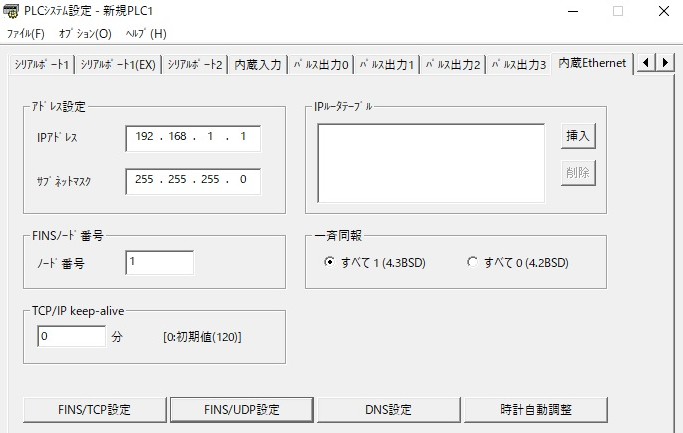

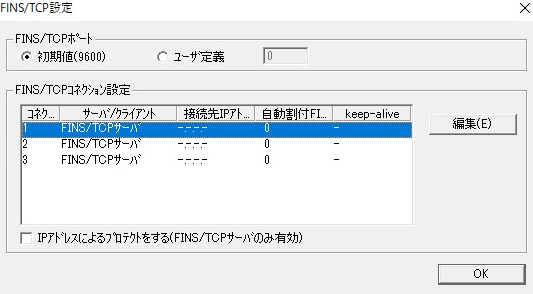

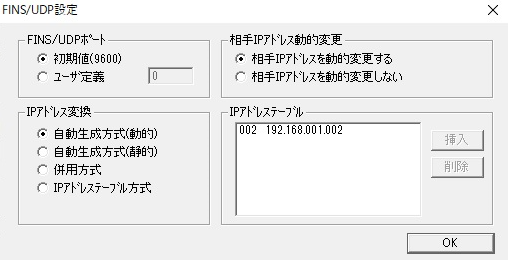

PLC側で、メモリへの書き込みプロテクトを解放する必要があります。  
On the PLC side, it is necessary to release the write protection to the memory.  
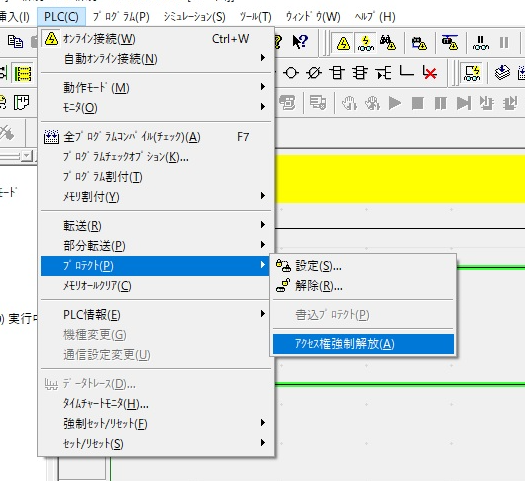

### ２．通信プログラム     Connection Code

### ２－１．データメモリDMの読み込み　Read the DataMemory value

In [ ]:
import socket
import binascii

def read_DM(DM_number):
    
    # IP_adress of PLC(connection destination)
    host = '192.168.1.1'
    port = 9600

    # Setting UDP connection
    client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
    client.connect((host,port))

    # ------------------ Send message ----------------------

    ICF = b'\x80'   # if you need response ICF=80,if not ICF=81     
    RSV = b'\x00'
    GCT = b'\x07'
    DNA = b'\x00'
    DA1 = b'\x01'   # Last number of PLC_IP_adress 192.168.1.1
    DA2 = b'\x00'
    SNA = b'\x00'
    SA1 = b'\x02'   # Last number of PC_IP_adress 192.168.1.2
    SA2 = b'\x00'  
    SID = b'\x00'  
    Command1 = b'\x01'
    Command2 = b'\x01'     # Read = 01,Write = 02
    DM = b'\x82'
    DM1 = b'\x00'     # DM_channel hex
    DM2 = DM_number   # DM_channel hex（DM00010→\x0a 、DM00020→\x14、DM00021→\x15）
    DM3 = b'\x00'     
    length1 = b'\x00' 
    length2 = b'\x01'    # Length of read channels

    msg = ICF+RSV+GCT+DNA+DA1+DA2+SNA+SA1+SA2+SID+Command1+Command2+DM+DM1+DM2+DM3+length1+length2

    # ------------------ send message ----------------------
    client.send(msg)
    response = client.recv(1024)
    #print('send = ',msg)

    # Transform response ASCII to strings   
    response = str(binascii.hexlify(response), 'utf-8')
    #print('response = ',response)

    print('Memory value = ',response[-1:])

    client.close()
    
    return response[-1:]

In [ ]:
# example-1  Read value of DM00020  (Dec:20 -> Hex:14)

read_DM(b'\x14')

### ２－２．データメモリDMへの書き込み　Write the value to DataMemory

In [ ]:
import socket
import binascii

def write_DM(DM_number,write_number):

    # IP_adress of PLC(connection destination)
    host = '192.168.1.1'
    port = 9600

    # Setting UDP connection
    client = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
    client.connect((host,port))

    # ------------------ send message ----------------------

    ICF = b'\x80'    # if you need response ICF=80,if not ICF=81
    RSV = b'\x00'
    GCT = b'\x07'
    DNA = b'\x00'
    DA1 = b'\x01'     # Last number of PLC_IP_adress 192.168.1.1
    DA2 = b'\x00'
    SNA = b'\x00'
    SA1 = b'\x02'     # Last number of PC_IP_adress 192.168.1.2
    SA2 = b'\x00'  
    SID = b'\x00'  
    Command1 = b'\x01'
    Command2 = b'\x02'    # Read = 01,Write = 02
    DM = b'\x82'
    DM1 = b'\x00'         # DM_channel hex
    DM2 = DM_number       # DM_channel hex（DM00010→\x0a 、DM00020→\x14、DM00021→\x15）
    DM3 = b'\x00'
    length1 = b'\x00' 
    length2 = b'\x01'     # Length of read channels
    tex1 = b'\x00'        # Value for write
    tex2 = write_number   # Value for write

    msg = ICF+RSV+GCT+DNA+DA1+DA2+SNA+SA1+SA2+SID+Command1+Command2+DM+DM1+DM2+DM3+length1+length2+tex1+tex2

    # ------------------ send message ----------------------

    client.send(msg)
    response = client.recv(1024)
    #print('send = ',msg)

    # Transform response ASCII to strings
    response = str(binascii.hexlify(response), 'utf-8')
    #print('response = ',response)

    client.close()
    
    return

In [ ]:
# example-2  Write '1' to DM00010  (Dec:10 -> Hex:0a)

write_DM(b'\x0a',b'\x01')

### ２－３　使用例　Examples of use

DM00010 に0と1を1秒間隔で交互に書き込む。  
Write 0 and 1 to DM00010 alternately at 1-second intervals.

In [ ]:
import time

white True:
    write_DM(b'\x0a',b'\x01')
    
    time.sleep(1)
    
    write_DM(b'\x0a',b'\x00')
    
    time.sleep(1)
